In [5]:
import pandas as pd
import os

In [6]:
os.chdir("/home/chris/Tutorials/Pandas Materials/2.1 Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs")

In [7]:
titanic = pd.read_csv("titanic.csv")

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    889 non-null object
deck        203 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [10]:
titanic_slice = titanic.iloc[:10,[2,3]]

In [11]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [13]:
titanic_slice.groupby("sex")

In [14]:
gbo = titanic_slice.groupby("sex")
gbo

In [15]:
gbo.groups

{'female': Int64Index([1, 2, 3, 8, 9], dtype='int64'),
 'male': Int64Index([0, 4, 5, 6, 7], dtype='int64')}

In [16]:
l = list(gbo)
l

[('female',       sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0), ('male',     sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [17]:
len(l)

2

In [18]:
l[0]

('female',       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [19]:
l[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [21]:
summer = pd.read_csv("summer.csv")

In [22]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [24]:
summer.Country.nunique()

147

In [26]:
titanic.groupby("sex")["fare","age"].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [28]:
new_df =titanic.groupby("sex").sum()
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [30]:
new_df =titanic.groupby("sex")["survived","age","fare"].max()
new_df

,survived,age,fare
sex,,,
female,1,63.0,512.3292
male,1,80.0,512.3292


In [31]:
new_df =titanic.groupby("sex").mean()
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

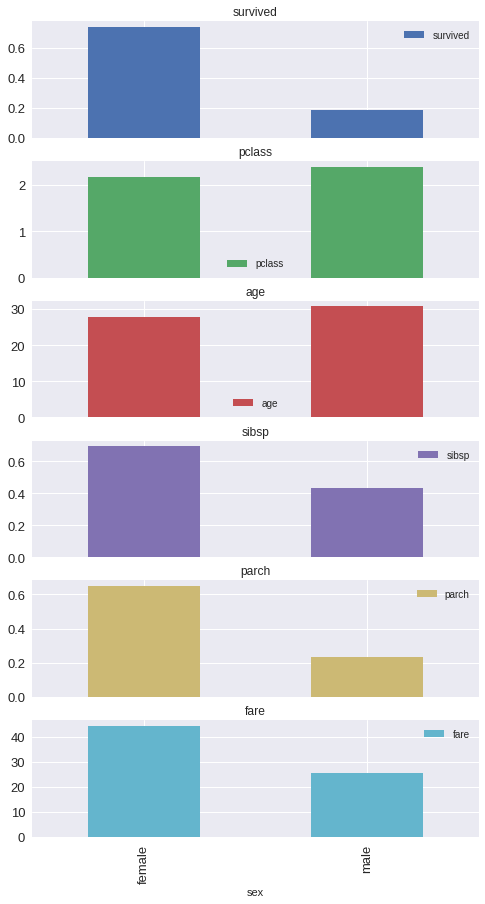

In [36]:
new_df.plot(kind="bar",subplots=True,figsize=(8,15),fontsize=13)
plt.show()

In [39]:
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n=20)
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

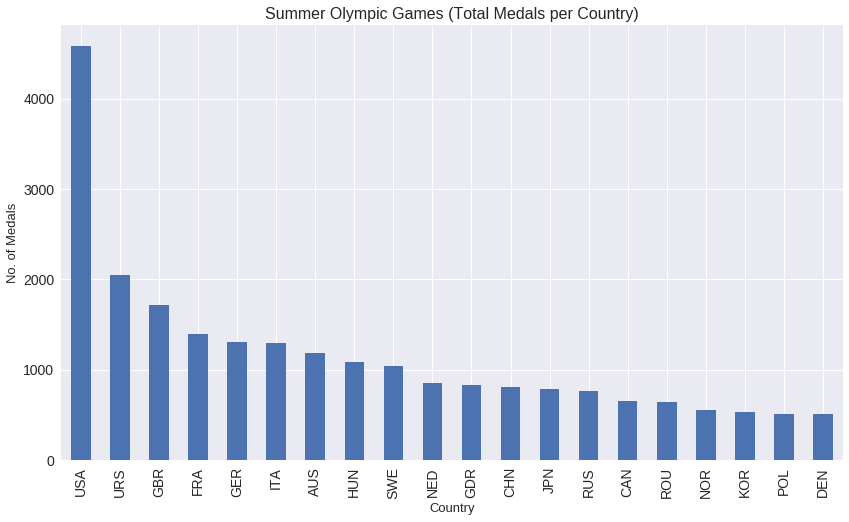

In [41]:
medals_per_country.plot(kind="bar",figsize=(14,8),fontsize=14)
plt.xlabel("Country",fontsize=13)
plt.ylabel("No. of Medals",fontsize=13)
plt.title("Summer Olympic Games (Total Medals per Country)",fontsize=16)
plt.show()

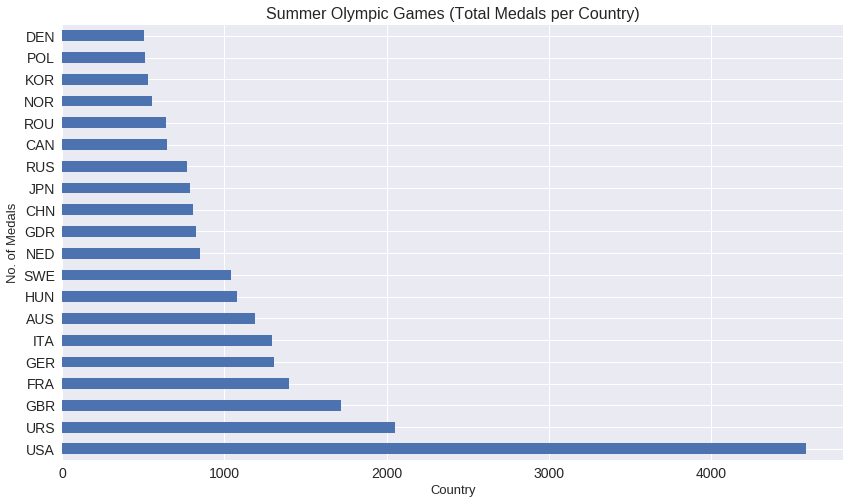

In [42]:
medals_per_country.plot(kind="barh",figsize=(14,8),fontsize=14)
plt.xlabel("Country",fontsize=13)
plt.ylabel("No. of Medals",fontsize=13)
plt.title("Summer Olympic Games (Total Medals per Country)",fontsize=16)
plt.show()

In [43]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
titanic.fare.mean()

32.2042079685746

In [45]:
titanic.groupby("pclass")["fare"].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [46]:
titanic.survived.mean()

0.3838383838383838

In [47]:
titanic.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [48]:
titanic.groupby("pclass")["survived"].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [49]:
titanic["ad_chi"] = "adult"

In [50]:
titanic.loc[titanic.age < 18,"ad_chi"] = "child"

In [51]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult


In [52]:
titanic.ad_chi.value_counts()

adult    778
child    113
Name: ad_chi, dtype: int64

In [53]:
titanic.groupby("ad_chi")["survived"].mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [54]:
titanic.groupby(["sex","ad_chi"])["survived"].count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [55]:
titanic.groupby(["sex","ad_chi"])["survived"].mean().sort_values(ascending=False)

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: survived, dtype: float64

In [58]:
w_and_c_first = titanic.groupby(["sex","ad_chi"])["survived"].mean().sort_values(ascending=True)

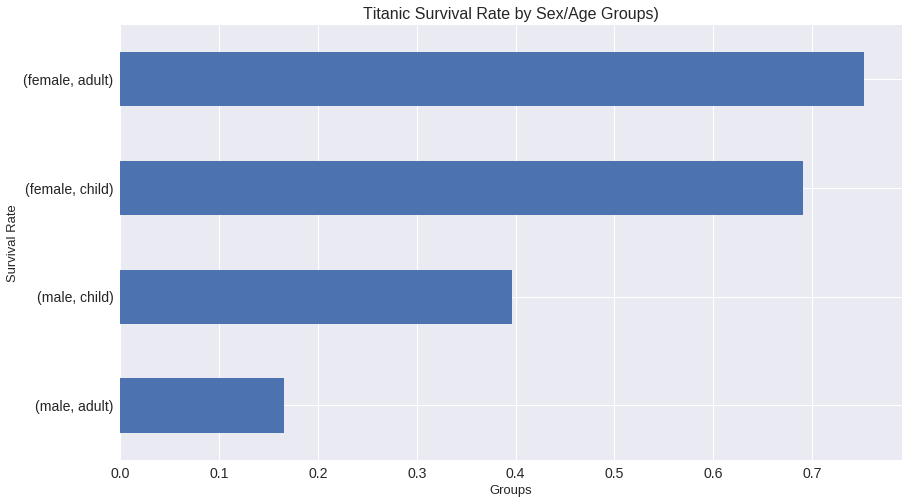

In [59]:
w_and_c_first.plot(kind="barh",figsize=(14,8),fontsize=14)
plt.xlabel("Groups",fontsize=13)
plt.ylabel("Survival Rate",fontsize=13)
plt.title("Titanic Survival Rate by Sex/Age Groups)",fontsize=16)
plt.show()

In [60]:
titanic = pd.read_csv("titanic.csv",usecols=["survived","pclass","age","sex","fare"])

In [61]:
titanic.groupby("sex").mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [62]:
titanic.groupby("sex").sum()

,survived,pclass,age,fare
sex,,,,
female,233,678,7286.00,13966.6628
male,109,1379,13919.17,14727.2865


In [63]:
titanic.groupby("sex").agg(["mean","sum","min","max"])

survived                 pclass                      age            \
            mean  sum min max      mean   sum min max       mean       sum   
sex                                                                          
female  0.742038  233   0   1  2.159236   678   1   3  27.915709   7286.00   
male    0.188908  109   0   1  2.389948  1379   1   3  30.726645  13919.17   

                         fare                              
         min   max       mean         sum   min       max  
sex                                                        
female  0.75  63.0  44.479818  13966.6628  6.75  512.3292  
male    0.42  80.0  25.523893  14727.2865  0.00  512.3292

In [66]:
titanic.groupby("sex").agg({"survived":["sum","mean"],"pclass":"mean","age":["mean","median"],"fare":"max"})

survived              pclass        age             fare
            sum      mean      mean       mean median       max
sex                                                            
female      233  0.742038  2.159236  27.915709   27.0  512.3292
male        109  0.188908  2.389948  30.726645   29.0  512.3292

In [67]:
titanic.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [68]:
titanic.groupby("sex").agg(survival_rate = ("survived","mean"))

,survival_rate
sex,
female,0.742038
male,0.188908


In [69]:
titanic.groupby("sex").agg({"survived":["sum","mean"],"age":["mean"]})

survived                  age
            sum      mean       mean
sex                                 
female      233  0.742038  27.915709
male        109  0.188908  30.726645

In [71]:
titanic.groupby("sex").agg(survived_total=("survived","sum"),
                          survival_rate = ("survived","mean"),
                          mean_age = ("age","mean"))

,survived_total,survival_rate,mean_age
sex,,,
female,233,0.742038,27.915709
male,109,0.188908,30.726645


## Transformation

In [72]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [150]:
titanic.groupby(["sex","pclass"]).survived.mean().unstack()

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [75]:
titanic.groupby(["sex","pclass"]).survived.transform("mean")

0      0.135447
1      0.968085
2      0.500000
3      0.968085
4      0.135447
         ...   
886    0.157407
887    0.968085
888    0.500000
889    0.368852
890    0.135447
Name: survived, Length: 891, dtype: float64

In [74]:
titanic["group_surv_rate"] = titanic.groupby(["sex","pclass"]).survived.transform("mean")

In [76]:
titanic.head()

,survived,pclass,sex,age,fare,group_surv_rate
0,0,3,male,22.0,7.2500,0.135447
1,1,1,female,38.0,71.2833,0.968085
2,1,3,female,26.0,7.9250,0.500000
3,1,1,female,35.0,53.1000,0.968085
4,0,3,male,35.0,8.0500,0.135447


In [78]:
titanic["outliers"] = abs(titanic.survived - titanic.group_surv_rate)
titanic.head()

,survived,pclass,sex,age,fare,group_surv_rate,outliers
0,0,3,male,22.0,7.2500,0.135447,0.135447
1,1,1,female,38.0,71.2833,0.968085,0.031915
2,1,3,female,26.0,7.9250,0.500000,0.500000
3,1,1,female,35.0,53.1000,0.968085,0.031915
4,0,3,male,35.0,8.0500,0.135447,0.135447


In [79]:
titanic.outliers.describe()

count    891.000000
mean       0.286847
std        0.247409
min        0.031915
25%        0.135447
50%        0.135447
75%        0.500000
max        0.968085
Name: outliers, dtype: float64

In [83]:
titanic[titanic.outliers > 0.85].head()

,survived,pclass,sex,age,fare,group_surv_rate,outliers
36,1,3,male,NaN,7.2292,0.135447,0.864553
41,0,2,female,27.0,21.0000,0.921053,0.921053
65,1,3,male,NaN,15.2458,0.135447,0.864553
74,1,3,male,32.0,56.4958,0.135447,0.864553
81,1,3,male,29.0,9.5000,0.135447,0.864553


## Replacing NAs byGroup Specific Values

In [93]:
titanic = pd.read_csv("titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    889 non-null object
deck        203 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [94]:
titanic.groupby(["sex","pclass"]).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [95]:
titanic["group_mean_age"] = titanic.groupby(["sex","pclass"]).age.transform("mean")

In [96]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.0,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.0,1,0,71.2833,C,C,34.611765
2,1,3,female,26.0,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.0,1,0,53.1000,S,C,34.611765
4,0,3,male,35.0,0,0,8.0500,S,NaN,26.507589
5,0,3,male,NaN,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.0,0,0,51.8625,S,E,41.281386
7,0,3,male,2.0,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.0,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.0,1,0,30.0708,C,NaN,28.722973


In [97]:
titanic.age.fillna(titanic.group_mean_age,inplace=True)

In [98]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.000000,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.000000,1,0,71.2833,C,C,34.611765
2,1,3,female,26.000000,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.000000,1,0,53.1000,S,C,34.611765
4,0,3,male,35.000000,0,0,8.0500,S,NaN,26.507589
5,0,3,male,26.507589,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.000000,0,0,51.8625,S,E,41.281386
7,0,3,male,2.000000,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.000000,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.000000,1,0,30.0708,C,NaN,28.722973


In [92]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
survived           891 non-null int64
pclass             891 non-null int64
sex                891 non-null object
age                891 non-null float64
fare               891 non-null float64
group_surv_rate    891 non-null float64
outliers           891 non-null float64
group_mean_age     891 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 55.8+ KB


In [100]:
titanic = pd.read_csv("titanic.csv",usecols = ["survived","pclass","sex","age","fare"])

In [101]:
titanic.groupby("sex").mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [104]:
female_group = list(titanic.groupby("sex"))[0][1]
female_group

,survived,pclass,sex,age,fare
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708
...,...,...,...,...,...
880,1,2,female,25.0,26.0000
882,0,3,female,22.0,10.5167
885,0,3,female,39.0,29.1250
887,1,1,female,19.0,30.0000


In [105]:
female_group.mean()

survived     0.742038
pclass       2.159236
age         27.915709
fare        44.479818
dtype: float64

In [106]:
def group_mean (group):
    return group.mean()


In [107]:
group_mean(female_group)

survived     0.742038
pclass       2.159236
age         27.915709
fare        44.479818
dtype: float64

In [108]:
titanic.groupby("sex").apply(group_mean)

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [109]:
titanic.nlargest(5,"age")

,survived,pclass,sex,age,fare
630,1,1,male,80.0,30.0000
851,0,3,male,74.0,7.7750
96,0,1,male,71.0,34.6542
493,0,1,male,71.0,49.5042
116,0,3,male,70.5,7.7500


In [112]:
def five_oldest_surv (group):
    return group[group.survived==1].nlargest(5,"age")

In [113]:
titanic.groupby("sex").apply(five_oldest_surv)

survived  pclass     sex   age     fare
sex                                                
female 275         1       1  female  63.0  77.9583
       483         1       3  female  63.0   9.5875
       829         1       1  female  62.0  80.0000
       366         1       1  female  60.0  75.2500
       11          1       1  female  58.0  26.5500
male   630         1       1    male  80.0  30.0000
       570         1       2    male  62.0  10.5000
       587         1       1    male  60.0  79.2000
       647         1       1    male  56.0  35.5000
       449         1       1    male  52.0  30.5000

In [114]:
titanic = pd.read_csv("titanic.csv",usecols = ["survived","pclass","sex","age","fare"])

In [115]:
summary = titanic.groupby(["sex","pclass"]).mean()

In [116]:
summary

survived        age        fare
sex    pclass                                 
female 1       0.968085  34.611765  106.125798
       2       0.921053  28.722973   21.970121
       3       0.500000  21.750000   16.118810
male   1       0.368852  41.281386   67.226127
       2       0.157407  30.740707   19.741782
       3       0.135447  26.507589   12.661633

In [117]:
summary.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

In [118]:
summary.loc[("female",2),:]

survived     0.921053
age         28.722973
fare        21.970121
Name: (female, 2), dtype: float64

In [119]:
summary.loc[("female",2),"age"]

28.722972972972972

In [121]:
## swapindex changes inner & outer indexes
summary.swaplevel().sort_index()

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

In [122]:
summary.reset_index()

,sex,pclass,survived,age,fare
0,female,1,0.968085,34.611765,106.125798
1,female,2,0.921053,28.722973,21.970121
2,female,3,0.500000,21.750000,16.118810
3,male,1,0.368852,41.281386,67.226127
4,male,2,0.157407,30.740707,19.741782
5,male,3,0.135447,26.507589,12.661633


## Stack & Unstack

In [123]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [125]:
medals_by_country = summer.groupby(["Country","Medal"]).Medal.count()
medals_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [126]:
medals_by_country.loc["USA"]

Medal
Bronze    1098
Gold      2235
Silver    1252
Name: Medal, dtype: int64

In [127]:
medals_by_country.loc[("USA","Gold")]

2235

In [128]:
medals_by_country.shape

(347,)

In [129]:
medals_by_country.unstack()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [130]:
medals_by_country.unstack(level=-2)

Country,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Medal,,,,,,,,,,,,,,,,,,,,,
Bronze,2.0,NaN,8.0,5.0,91.0,8.0,472.0,44.0,15.0,5.0,...,584.0,30.0,1098.0,10.0,8.0,NaN,118.0,1.0,1.0,10.0
Gold,NaN,NaN,5.0,20.0,69.0,1.0,312.0,21.0,6.0,13.0,...,838.0,44.0,2235.0,5.0,2.0,NaN,143.0,NaN,18.0,23.0
Silver,NaN,1.0,2.0,4.0,99.0,2.0,405.0,81.0,5.0,9.0,...,627.0,2.0,1252.0,5.0,2.0,2.0,174.0,1.0,4.0,15.0


In [135]:
medals_by_country = medals_by_country.unstack(level=-1,fill_value=0)
medals_by_country.head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99


In [136]:
medals_by_country.shape

(147, 3)

In [138]:
medals_by_country = medals_by_country[["Gold","Silver","Bronze"]]
medals_by_country

Medal,Gold,Silver,Bronze
Country,,,
AFG,0,0,2
AHO,0,1,0
ALG,5,2,8
ANZ,20,4,5
ARG,69,99,91
...,...,...,...
VIE,0,2,0
YUG,143,174,118
ZAM,0,1,1


In [139]:
medals_by_country.sort_values(by=["Gold","Silver","Bronze"],ascending=[False,False,False],inplace=True)

In [140]:
medals_by_country.head(10)

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [142]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

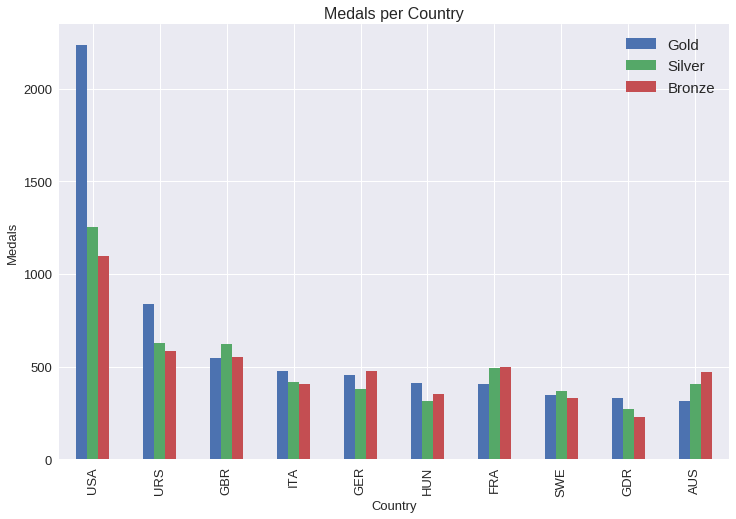

In [145]:
medals_by_country.head(10).plot(kind="bar",figsize=(12,8),fontsize=13)
plt.xlabel("Country",fontsize=13)
plt.ylabel("Medals",fontsize=13)
plt.title("Medals per Country",fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [147]:
medals_by_country

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1


In [148]:
medals_by_country.stack()

Country  Medal 
USA      Gold      2235
         Silver    1252
         Bronze    1098
URS      Gold       838
         Silver     627
                   ... 
NIG      Silver       0
         Bronze       1
TOG      Gold         0
         Silver       0
         Bronze       1
Length: 441, dtype: int64

In [149]:
medals_by_country.stack().unstack()

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1
